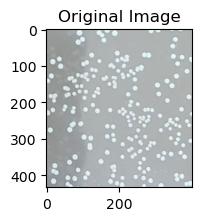

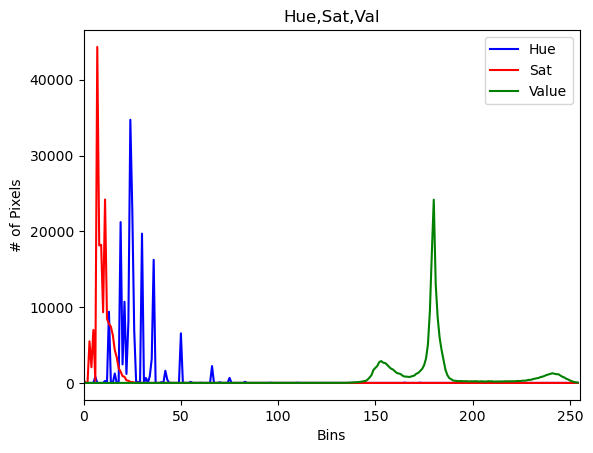

There are 150 circles in this image


In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# "imread" : read the image files using file name
image = cv2.imread(r'C:\Users\****\Desktop\CountingCircle.jpg')

imageHSV = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
#imageHSV = cv2.cvtColor(image, cv2.COLOR_HSV2GRAY)
plt.subplot(131), plt.imshow(image, 'gray'), plt.title("Original Image")


(Hue, Sat, Val) = cv2.split(imageHSV)
histHue = cv2.calcHist([Hue], [0], None, [255], [0,255])
histSat = cv2.calcHist([Sat], [0], None, [255], [0,255])
histVal = cv2.calcHist([Val], [0], None, [255], [0,255])
HSVspace = np.hstack([Hue,Sat,Val])

plt.figure()
plt.title("Hue,Sat,Val")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")

plt.plot(histHue,"b")
plt.plot(histSat,"r")
plt.plot(histVal,"g")
plt.legend(('Hue','Sat','Value'))
plt.xlim([0,255])
plt.show()


b_bur=cv2.GaussianBlur(Val,(5,5),0)
kernel = np.ones((2, 2), np.uint8)   

(T, thr) = cv2.threshold(b_bur, 200, 255, cv2.THRESH_BINARY)
cv2.imshow("Threshold Binary", thr)

image_dilate = cv2.dilate(thr,kernel,iterations=1)
cv2.imshow("Image dilate",image_dilate)


count,hierarchy = cv2.findContours(image_dilate,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
print("There are %d circles in this image" % (len(count)))


circle = image.copy()
cv2.drawContours(circle,count,-1,(0,0,255),1)
cv2.imshow("Circles",circle)

cv2.imshow("reg_",cv2.boundingRect(count[0]))
cv2.waitKey(0)